## Using NDVI to Review CALMS Data: Quality Control and Snow/Cloud Flags from Agriculture and Agri-Food Canada (Year: 2024, Days: 134-140)

In [8]:
import rasterio # library for geospatial data
import numpy as np
import matplotlib.pyplot as plt

In [31]:
tif_file = "AgExtent.MOD.SnowFraction.CloudCover.OtherQuality.MaxNDVI.2024134.2024140.tif"

with rasterio.open(tif_file) as src:
    ndvi = src.read(1)  # Read the first band
    profile = src.profile  # Metadata 

print(profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 256.0, 'width': 12606, 'height': 4387, 'count': 1, 'crs': CRS.from_wkt('PROJCS["User_Defined_Sinusoidal",GEOGCS["GCS_User_Defined",DATUM["D_User_Defined",SPHEROID["User_Defined_Spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(463.3127165275001, 0.0, -9176371.663549671,
       0.0, -463.3127165275002, 6671703.117999997), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


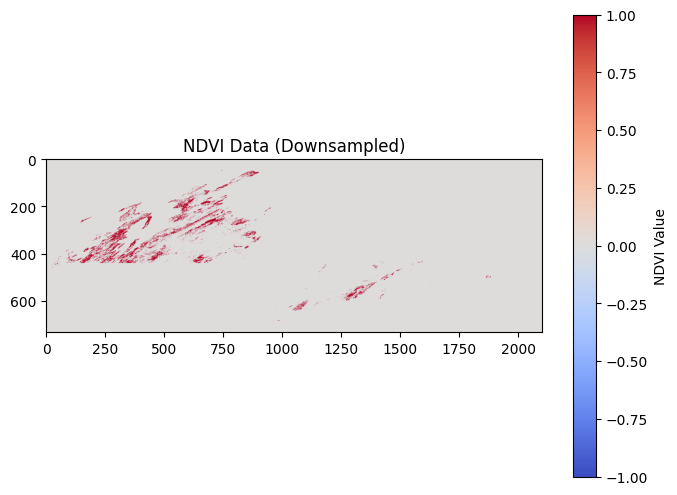

In [22]:
with rasterio.open(tif_file) as src:
    scale_factor = 6  # Adjust this (higher = more downsampling)
    small_ndvi = src.read(1)[::scale_factor, ::scale_factor]  # Downsample by taking every 6th pixel
    profile = src.profile  # Metadata

plt.figure(figsize=(8, 6))
plt.imshow(small_ndvi, cmap="coolwarm", vmin=-1, vmax=1)  
plt.colorbar(label="NDVI Value")
plt.title("NDVI Data (Downsampled)")
plt.show()

## NDVI (Normalized Difference Vegetation Index) used to assess whether the target area contains live vegetation or not, and how healthy that vegetation is. NDVI values range from -1 to 1, where:

- Positive values (0 to 1): Live vegetation, with higher values suggesting healthier and denser vegetation.
- Close to -1: Water, snow, or clouds.